<a href="https://colab.research.google.com/github/Amit2393/EDA-On-Global-Terrorism-Analysis/blob/main/AMIT_KUMAR_ROUT_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# <b> “Everyone’s worried about stopping terrorism. Well, there’s really an easy way: Stop participating in it.” </b>
This quote belongs to Noam Chomsky. is an American linguist, philosopher, cognitive scientist, historian,social critic, and political activist. Sometimes called "The Father Of Modern Linguistics",Chomsky is also a major figure in analytic philosophy and one of the founders of the field of cognitive science (source: https://en.wikipedia.org/wiki/Noam_Chomsky)

Data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data), and applying the knowledge and actionable insights from data to solve problems in a wide range of application domains

Data analysis, is a process for obtaining raw data, and subsequently converting it into information useful for decision-making by users and here we goona see how the terrorism affect our day to day life;


1. <b>Data requirements</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Data collection</b>. Data are collected from a variety of sources but here we have a GTD database.
3. <b>Data processing</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Data cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.

Then lets start our journey to Global Terrorism Database


In [ ]:
#import liaberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
#mount drive
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
#lets coolect the data set
data= pd.read_csv("/content/drive/MyDrive/capstoneproject/GTD.csv",encoding='ISO-8859-1',low_memory=False)


In [ ]:
# first five of data set
data.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#Last five of data set
data.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#shape of the data set
data.shape

(181691, 135)

##<b> Ohh my gosh!!! it's a huge data base with 181691 events(rows) and 135 variables(columns).<b/>

lets go through the data base and pick the useful  data from these


#<b> lets check the concise size of the data frame.

 For Checking the concise size of the dataframe we will use .##<b>info()</b> function.It will be helpful when doing exploratory analysis of the data set or in other words you can say this will give us a quick overview of the dataset.
 

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Dtype  
---  ------              -----  
 0   eventid             int64  
 1   iyear               int64  
 2   imonth              int64  
 3   iday                int64  
 4   approxdate          object 
 5   extended            int64  
 6   resolution          object 
 7   country             int64  
 8   country_txt         object 
 9   region              int64  
 10  region_txt          object 
 11  provstate           object 
 12  city                object 
 13  latitude            float64
 14  longitude           float64
 15  specificity         float64
 16  vicinity            int64  
 17  location            object 
 18  summary             object 
 19  crit1               int64  
 20  crit2               int64  
 21  crit3               int64  
 22  doubtterr           float64
 23  alternative         float64
 24  alternative_txt     objec

##We can see from the above output of the info() function, it gives us the each columns name including it's data type.As it gives us the column name including its data type we will not use dataframe.column() function un-necessarilly.As our main moto is to extract useful info using less coding


###The . describe() method gives us summary statistics for numerical columns in our DataFrame which will gonna help us during  plotting box plot

In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

### Lets do some data cleaning 


In [ ]:
#To know number of missing values for each variable
data.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

## As the data set size is big enough and from data processing we found some the variables is not useful for our further data analysis and data visualization part so lets select only required columns and rename it and stored them in a new data frame for our further course of action.

In [ ]:
#SELECT ONLY RELEVANT COLUMNS FOR OUR DATA ANALYSIS PROSPECTIVE
data.rename(columns= {'iyear':'YEAR','imonth':'MONTH','iday':'DAY','country_txt':'COUNTRY','region_txt':'REGION NAME','attacktype1_txt':'ATTACK TYPE','targtype1_txt':'TARGET TYPE','weaptype1_txt':'WEAPON USED','nkill':'KILL','success':'SUCCESS RATE','gname':'RESPONSIBLE GROUP','property':'PROPERTY'}, inplace=True)


In [ ]:
data_relevant=data[['YEAR','MONTH','DAY','COUNTRY','REGION NAME','ATTACK TYPE','TARGET TYPE','WEAPON USED','KILL','SUCCESS RATE','RESPONSIBLE GROUP','PROPERTY']]

In [ ]:
data_relevant.head(5)

,YEAR,MONTH,DAY,COUNTRY,REGION NAME,ATTACK TYPE,TARGET TYPE,WEAPON USED,KILL,SUCCESS RATE,RESPONSIBLE GROUP,PROPERTY
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,Unknown,1.0,1,MANO-D,0
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,1,23rd of September Communist League,0
2,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Unknown,1.0,1,Unknown,0
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,1,Unknown,1
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,1,Unknown,1


### Great!!!!

Now you can see after picking up required column and create  a new data frame  

In [ ]:
data_relevant.duplicated().sum()

21842

In [ ]:
data_relevant.shape

(181691, 13)

In [ ]:
data_relevant.describe()

,YEAR,MONTH,DAY,REGION,KILL,SUCCESS RATE,PROPERTY
count,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,7.160938,2.403272,0.889598,-0.544556
std,13.259430,3.388303,8.814045,2.933408,11.545741,0.313391,3.122889
min,1970.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-9.000000
25%,1991.000000,4.000000,8.000000,5.000000,0.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,6.000000,0.000000,1.000000,1.000000
75%,2014.000000,9.000000,23.000000,10.000000,2.000000,1.000000,1.000000
max,2017.000000,12.000000,31.000000,12.000000,1570.000000,1.000000,1.000000


In [ ]:
data_relevant.tail()

,YEAR,MONTH,DAY,COUNTRY,REGION,REGION NAME,ATTACK TYPE,TARGET,WEAPON USED,KILL,SUCCESS RATE,RESPONSIBLE GROUP,PROPERTY
181686,2017,12,31,Somalia,11,Sub-Saharan Africa,Armed Assault,Military,Firearms,1.0,1,Al-Shabaab,-9
181687,2017,12,31,Syria,10,Middle East & North Africa,Bombing/Explosion,Military,Explosives,2.0,1,Muslim extremists,1
181688,2017,12,31,Philippines,5,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,0.0,1,Bangsamoro Islamic Freedom Movement (BIFM),1
181689,2017,12,31,India,6,South Asia,Bombing/Explosion,Government (General),Explosives,0.0,0,Unknown,-9
181690,2017,12,31,Philippines,5,Southeast Asia,Bombing/Explosion,Unknown,Explosives,0.0,0,Unknown,0


In [ ]:
data_relevant.columns


Index(['YEAR', 'MONTH', 'DAY', 'COUNTRY', 'REGION NAME', 'ATTACK TYPE',
       'TARGET TYPE', 'WEAPON USED', 'KILL', 'SUCCESS RATE',
       'RESPONSIBLE GROUP', 'PROPERTY'],
      dtype='object')

In [ ]:
#data types in the data frame
data_relevant.dtypes

YEAR                   int64
MONTH                  int64
DAY                    int64
COUNTRY               object
REGION NAME           object
ATTACK TYPE           object
TARGET TYPE           object
WEAPON USED           object
KILL                 float64
SUCCESS RATE           int64
RESPONSIBLE GROUP     object
PROPERTY               int64
dtype: object

In [ ]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   YEAR               181691 non-null  int64  
 1   MONTH              181691 non-null  int64  
 2   DAY                181691 non-null  int64  
 3   COUNTRY            181691 non-null  object 
 4   REGION             181691 non-null  int64  
 5   REGION NAME        181691 non-null  object 
 6   ATTACK TYPE        181691 non-null  object 
 7   TARGET             181691 non-null  object 
 8   WEAPON USED        181691 non-null  object 
 9   KILL               171378 non-null  float64
 10  SUCCESS RATE       181691 non-null  int64  
 11  RESPONSIBLE GROUP  181691 non-null  object 
 12  PROPERTY           181691 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 18.0+ MB


As we can see KILL has some null value so lets replace it with the mean

In [ ]:
mean_kill=data_relevant['KILL'].mean()

In [ ]:
 data_relevant['KILL'].fillna(value=mean_kill)

0         1.000000
1         0.000000
2         1.000000
3         2.403272
4         2.403272
            ...   
181686    1.000000
181687    2.000000
181688    0.000000
181689    0.000000
181690    0.000000
Name: KILL, Length: 181691, dtype: float64

In [ ]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   YEAR               181691 non-null  int64  
 1   MONTH              181691 non-null  int64  
 2   DAY                181691 non-null  int64  
 3   COUNTRY            181691 non-null  object 
 4   REGION             181691 non-null  int64  
 5   REGION NAME        181691 non-null  object 
 6   ATTACK TYPE        181691 non-null  object 
 7   TARGET             181691 non-null  object 
 8   WEAPON USED        181691 non-null  object 
 9   KILL               171378 non-null  float64
 10  SUCCESS RATE       181691 non-null  int64  
 11  RESPONSIBLE GROUP  181691 non-null  object 
 12  PROPERTY           181691 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 18.0+ MB


#### As we can see the Null value in the kill was replaced with mean value of 'KILL' variable. 

## Now we wiil find the numbers of unique value in the data_relevant data frame

In [ ]:
# Count of Values in each column of DataFrame
data_relevant.nunique()

YEAR                   47
MONTH                  13
DAY                    32
COUNTRY               205
REGION                 12
REGION NAME            12
ATTACK TYPE             9
TARGET                 22
WEAPON USED            12
KILL                  205
SUCCESS RATE            2
RESPONSIBLE GROUP    3537
PROPERTY                3
dtype: int64

In [ ]:
data_relevant.isna().sum()

YEAR                     0
MONTH                    0
DAY                      0
COUNTRY                  0
REGION                   0
REGION NAME              0
ATTACK TYPE              0
TARGET                   0
WEAPON USED              0
KILL                 10313
SUCCESS RATE             0
RESPONSIBLE GROUP        0
PROPERTY                 0
dtype: int64

In [ ]:
# Years in the DataFrame
data_relevant["YEAR"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [ ]:
# Count of each year in the Data Frame
data_relevant["YEAR"].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: YEAR, dtype: int64

In [ ]:
# Total Count of the regions in the DataFrame
data_relevant['REGION NAME'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: REGION NAME, dtype: int64

## As expected Middle East & North Africa a.k.a MENA is most affected region over the world followed by South Asia

In [ ]:
# Total count of gname in the DataFrame
data_relevant['RESPONSIBLE GROUP'].value_counts()

Unknown                                                 82782
Taliban                                                  7478
Islamic State of Iraq and the Levant (ISIL)              5613
Shining Path (SL)                                        4555
Farabundo Marti National Liberation Front (FMLN)         3351
                                                        ...  
United Arab Revolution                                      1
Brother Julian                                              1
Popular Army for the Restoration of Democracy (APRD)        1
Concerned citizens                                          1
Dioulas tribal group                                        1
Name: RESPONSIBLE GROUP, Length: 3537, dtype: int64

##Strange 82782 times no terrorist orgaisations take any responsibilities.

In [ ]:
# Total count of Attack type in the DataFrame
data_relevant['ATTACK TYPE'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: ATTACK TYPE, dtype: int64

##From the above data we can see Bombing/Explosion is the main weapon used for any attack by the terrorist as it can do a large impact.

##As per US federal Bureau Of Investigation , bombing accounts for nearly 70% of all terrorist attacks in the USA.

##Hijacking is the least attack type as all the government tightened the securitities at the Airport.

In [ ]:
# Total count of Target type in the DataFrame
data_relevant['TARGET'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: TARGET, dtype: int64

#It's known to the everyone that Private Citizens & Property's are the main target for the terrorist groups do not know what they get by doing this as we all are lost  our beloved ones

In [ ]:
# Correlation among the columns
data_relevant.corr()

,YEAR,MONTH,DAY,REGION,KILL,SUCCESS RATE,PROPERTY
YEAR,1.000000,0.000139,0.018254,0.401384,0.015341,-0.082963,-0.278916
MONTH,0.000139,1.000000,0.005497,-0.002999,0.003463,-0.002845,-0.005816
DAY,0.018254,0.005497,1.000000,0.009710,-0.003693,-0.011802,-0.003903
REGION,0.401384,-0.002999,0.009710,1.000000,0.042062,-0.030909,-0.183279
KILL,0.015341,0.003463,-0.003693,0.042062,1.000000,0.053115,-0.016212
SUCCESS RATE,-0.082963,-0.002845,-0.011802,-0.030909,0.053115,1.000000,-0.036876
PROPERTY,-0.278916,-0.005816,-0.003903,-0.183279,-0.016212,-0.036876,1.000000


In [ ]:
# Slicing Data
data_relevant.iloc[0]

YEAR                                        1970
MONTH                                          7
DAY                                            2
COUNTRY                       Dominican Republic
REGION                                         2
REGION NAME          Central America & Caribbean
ATTACK TYPE                        Assassination
TARGET               Private Citizens & Property
WEAPON USED                              Unknown
KILL                                           1
SUCCESS RATE                                   1
RESPONSIBLE GROUP                         MANO-D
PROPERTY                                       0
Name: 0, dtype: object

In [ ]:
data_relevant.iloc[:,0] 

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: YEAR, Length: 181691, dtype: int64

In [ ]:
#most and least attacked countries
Most_attacked_countries = data_relevant['COUNTRY'].value_counts().head(1)
least_attacked_countries = data_relevant['COUNTRY'].value_counts().tail(1)
print(f'The most attacked country is {Most_attacked_countries}')
print(f'The most attacked country is {least_attacked_countries}')

The most attacked country is Iraq    24636
Name: COUNTRY, dtype: int64
The most attacked country is Wallis and Futuna    1
Name: COUNTRY, dtype: int64


## Till now we did our Data Mining part and from these we can able to get some idea about the database and some info like 

i. Most affected Region
ii.Terrorist Group
iii. Most used weapon
iv. Target Type

##Now start some Visualisation part

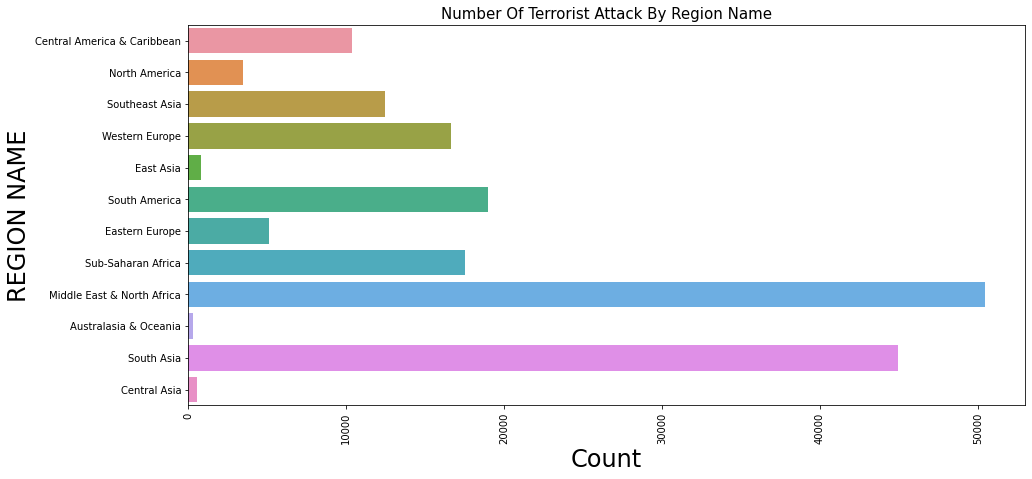

In [ ]:
#NUMBER OF ATTACKS BY REGION
f= plt.figure(figsize=(15,7))
year_count=sns.countplot(y='REGION NAME' ,data=data_relevant)
plt.xticks(rotation=90)
plt.ylabel('REGION NAME',fontsize=24)
plt.xlabel('Count',fontsize=24)
plt.title('Number Of Terrorist Attack By Region Name', fontsize=15)
plt.show()

## From the above graph it was now clear that MENA is the most attacked region in the world Followed by South Asia Region and South America

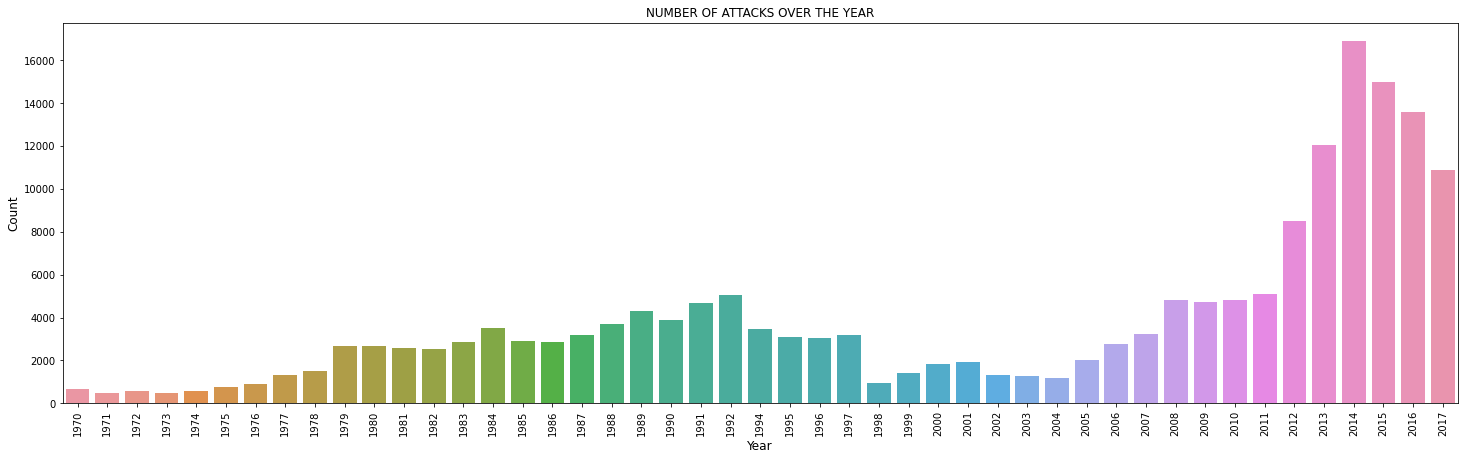

In [ ]:
#NUMBER OF ATTACKS OVER THE YEAR
f = plt.figure(figsize=(25,7))

year_count = sns.countplot(x='YEAR', data  = data_relevant)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize=12)
plt.title('NUMBER OF ATTACKS OVER THE YEAR',fontsize =12)
plt.show ()


##<b> OUTCOME OF THE ABOVE BAR PLOT (If We Consider Decade wise)

i.1970-1979: From 1974 terrorist activity gradually increased every year and reached its peak on 1979 for the decade 1970-1979.

ii. 1980-1989: In 1980 terrorist attack increased comparatively from 1979.In 1989 the attack tops for this decade.

iii. 1990-1999: In 1992 the attack tops for this decade.

iv. 2000-2009: Least for the year 2004 and gradually increased from 2005 upto 2008 and tops in the year 2008.

v. From 2010 to 2017 :  Gradually increased from 2010 and it reached its top in the year 2014 and after that it gradually decreased.

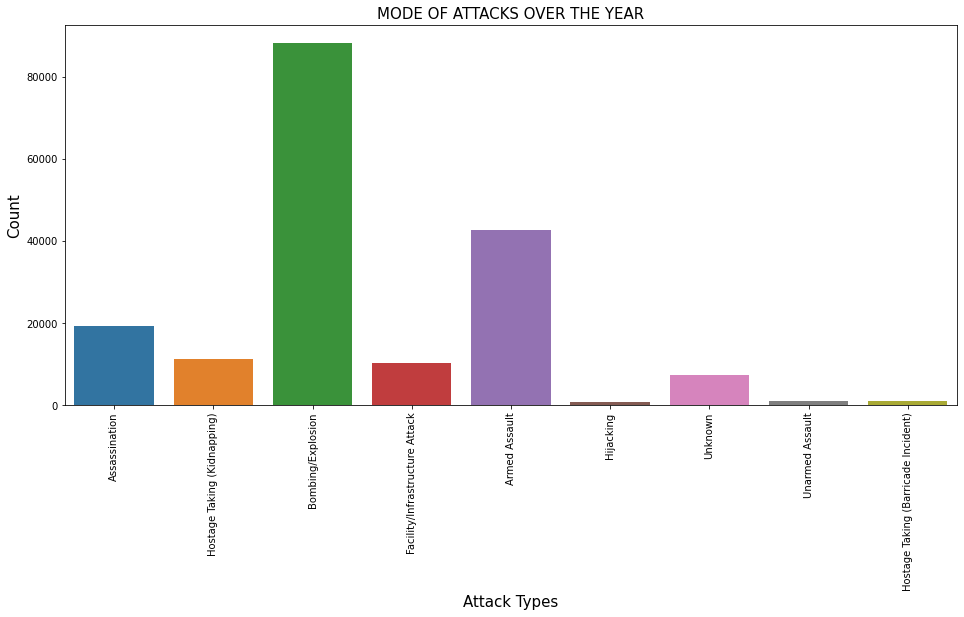

In [ ]:
# MODE OF ATTACKS
f = plt.figure(figsize=(16,7))

year_count = sns.countplot(x='ATTACK TYPE', data = data_relevant)
plt.xticks(rotation=90)
plt.xlabel('Attack Types', fontsize = 15)
plt.ylabel('Count', fontsize=15)
plt.title('MODE OF ATTACKS OVER THE YEAR',fontsize =15)
plt.show ()

## As we can see from the above plot that Bombing/Explosion is the  most used weapon by the terrorist groups followed by Armed Assault and Assassination

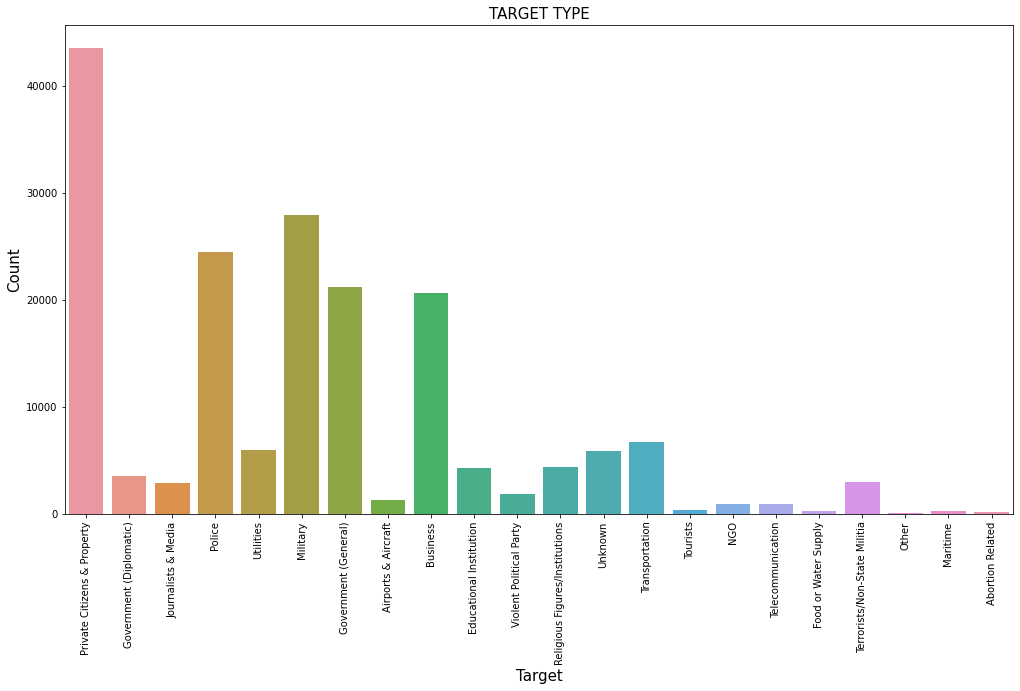

In [ ]:
#TYPES OF TARGET
f = plt.figure(figsize=(17,9))

year_count = sns.countplot(x='TARGET', data = data_relevant)
plt.xticks(rotation=90)
plt.xlabel('Target', fontsize = 15)
plt.ylabel('Count', fontsize=15)
plt.title('TARGET TYPE',fontsize =15)
plt.show ()

### Same thing we have already highlighted during TARGET.value_count() function that Private Citizens and Property was the target which was prioritsed by the all terrorist group followed by Military  and police.

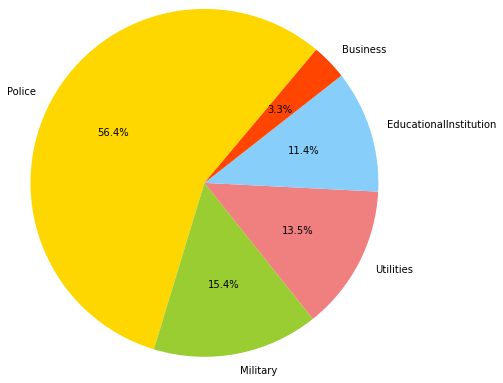

In [ ]:
#Pie Chart for Particular Target type
filtered = data['targtype1_txt'].apply(lambda x:x if x in ['Police','Military','Utilities','EducationalInstitution','Business'] else 'others')
target_type = filtered.value_counts().tolist()
target=['Police','Military','Utilities','EducationalInstitution','Business']
labels = list(target)
explode=(0.1,0,0,0,0)
cols = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orangered']
plt.pie(target_type,labels=labels,autopct='%1.1f%%',colors=cols,startangle=50,shadow=False,radius=2)
plt.show()




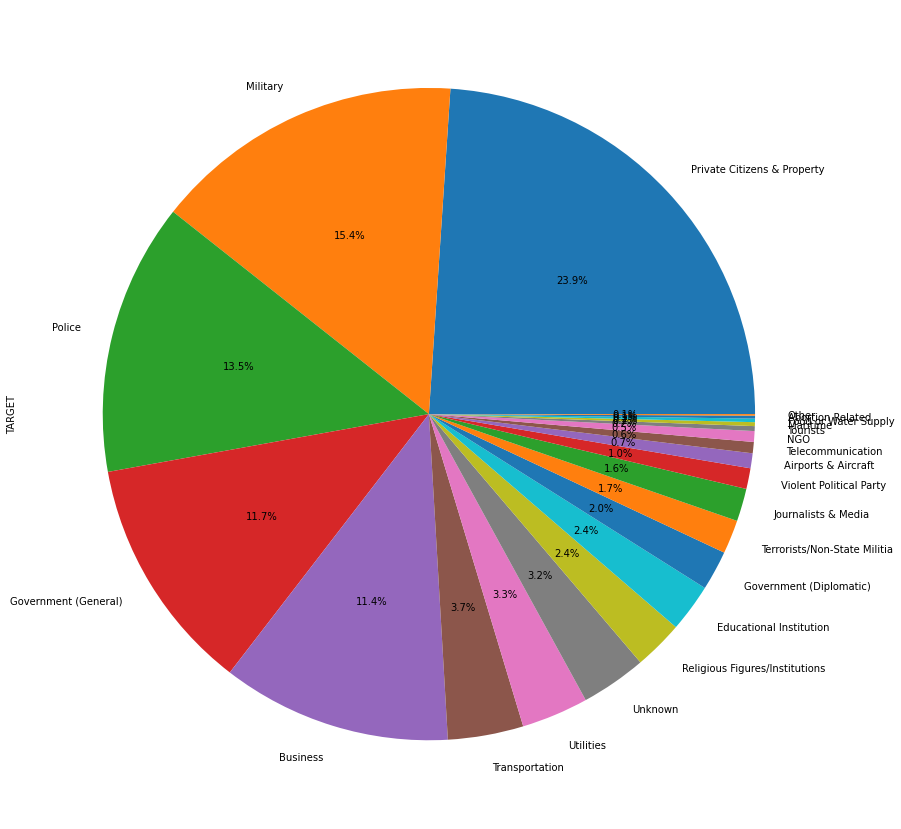

In [ ]:
#Pie Chart for All Target type
plt.figure(figsize=(15,15))
data_relevant['TARGET'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

## We have plot a pie plot to know the percentage of each traget types hold.

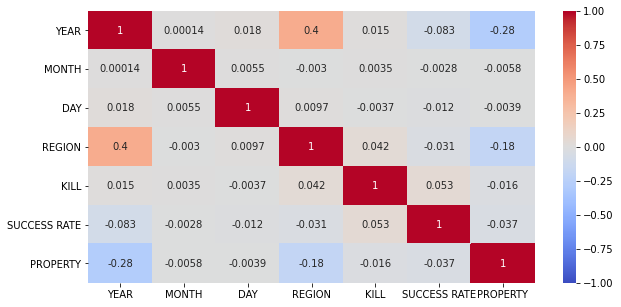

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data_relevant.corr(), vmin=-1, cmap='coolwarm', annot=True);

##Finding dependencies among the various parameters in the dataset can reveal a key pattern about the nature of terrorism, we have selected the most significant 7 for this map. Some of those parameters are the YEAR, MONTH, DAY, REGION, KILL, SUCCESS RATE and PROPERTY. Forming a correlation map can provide us with one-to-one correspondence of each variable with rest.

Text(0.5, 1.0, 'Types of Weapons')

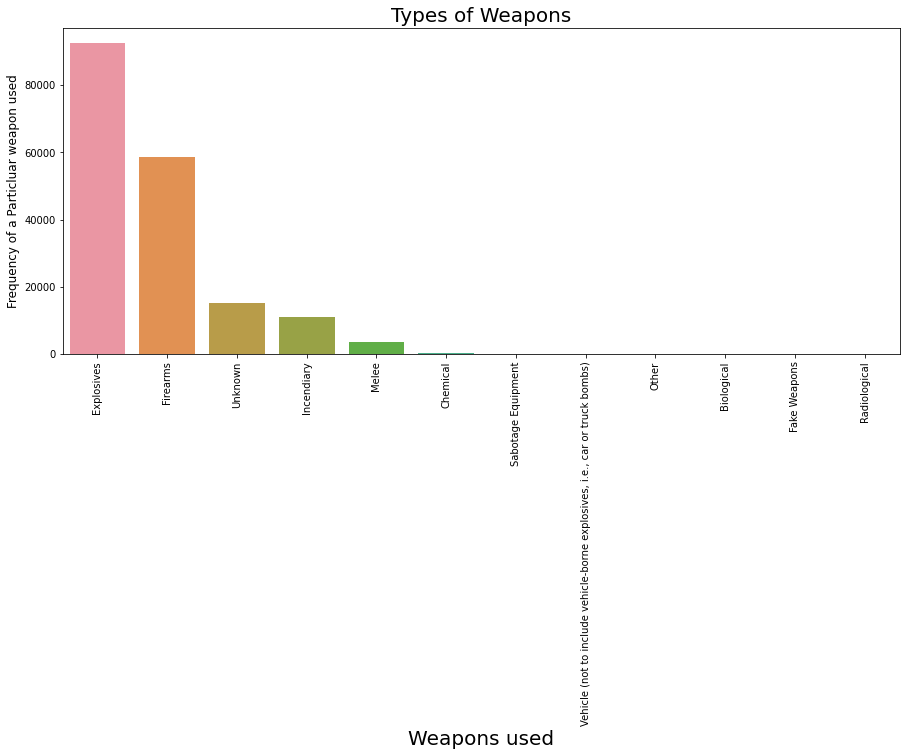

In [ ]:
# Frequency of each weapon used
plt.figure(figsize=(15,6))
sns.barplot(x= data_relevant["WEAPON USED"].value_counts()[:50].index,y = data_relevant["WEAPON USED"].value_counts()[:50].values)
plt.xlabel("Weapons used", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Frequency of a Particluar weapon used", fontsize=12)
plt.title("Types of Weapons", fontsize=20)

## From the above plot we can see that the EXPLOSIVES are the prime wepaon used by the terrorist.May be it's due to the large impact despite of using less qty.

In [ ]:
data_relevant['COUNTRY'].value_counts()
data_relevant['REGION NAME'].value_counts()
data_relevant['RESPONSIBLE GROUP'].value_counts()
data_relevant['ATTACK TYPE'].value_counts()
data_relevant['TARGET'].value_counts()
data_relevant['YEAR'].value_counts()
data_relevant['KILL'].value_counts()
print('Country with Highest Terrorist Attacks:',data_relevant['COUNTRY'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data_relevant['REGION NAME'].value_counts().index[0])
print('Maximum people killed in an attack are:',data_relevant['KILL'].max(),'that took place in',data_relevant.loc[data_relevant['KILL'].idxmax()].COUNTRY)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


Text(0.5, 1.0, 'Number of Terrorist Activities Countrywise')

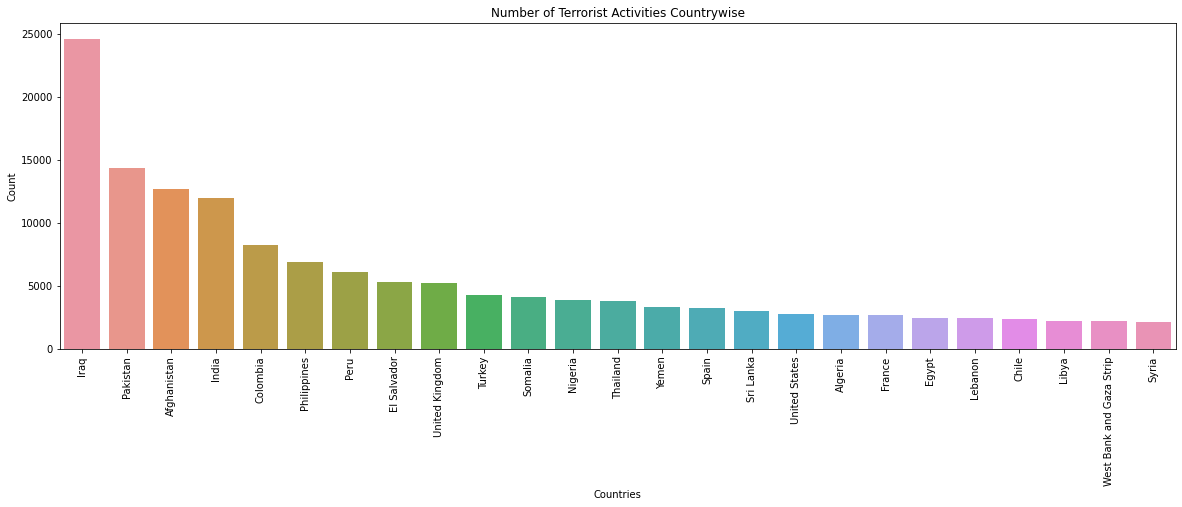

In [ ]:
# Number of Terrorist Activities Countrywise
plt.figure(figsize=(20,6))
sns.barplot(x=data_relevant['COUNTRY'].value_counts()[:25].index, y=data_relevant['COUNTRY'].value_counts()[:25])
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Number of Terrorist Activities Countrywise")

Iraq is one of the most suffered country due to terrorist activities in the world followed by Pakistan and Afghanistan.

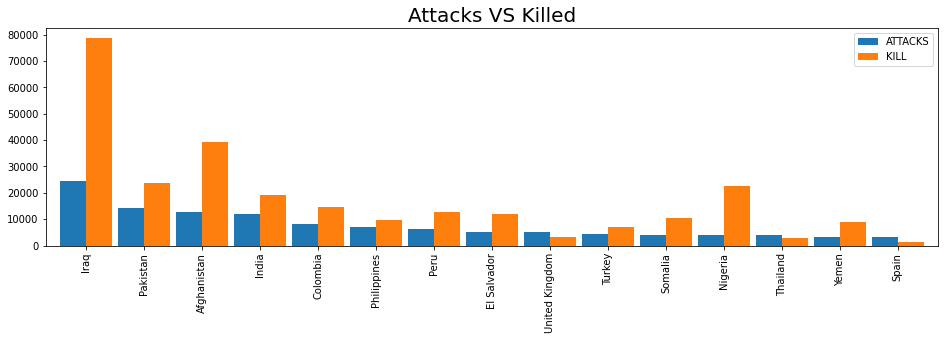

In [ ]:
# Attacks VS Killed
att_kill = data_relevant['COUNTRY'].value_counts()[:15].to_frame()
att_kill.columns=['ATTACKS']
kill_1=data_relevant.groupby ('COUNTRY')['KILL'].sum().to_frame()
att_kill.merge(kill_1,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()

The Attack vs Killed ratio is top in Iraq followed by Afghanistan and Pakistan.

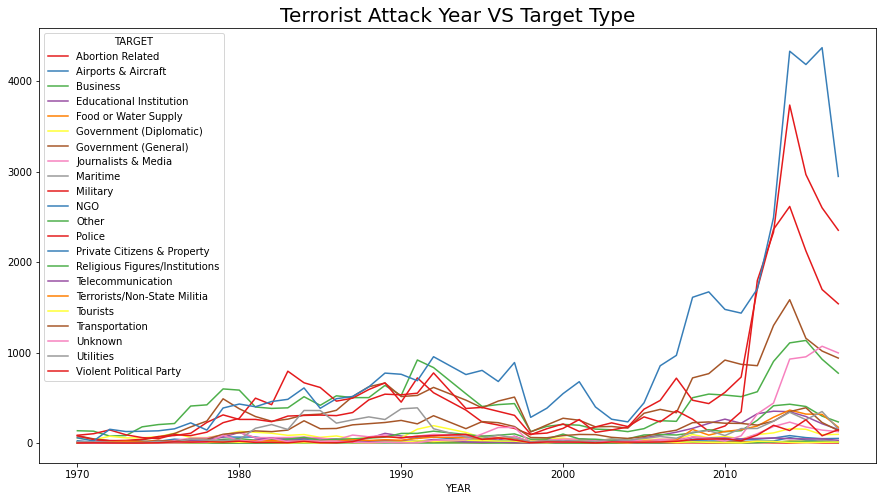

In [ ]:
# Terrorist Attack Year VS Target Type
data_region=pd.crosstab(data_relevant.YEAR,data_relevant.TARGET)
data_region.plot(color=sns.color_palette('Set1',12))
fig=plt.gcf()
plt.title("Terrorist Attack Year VS Target Type", fontsize=20)
fig.set_size_inches(15,8)
plt.show()

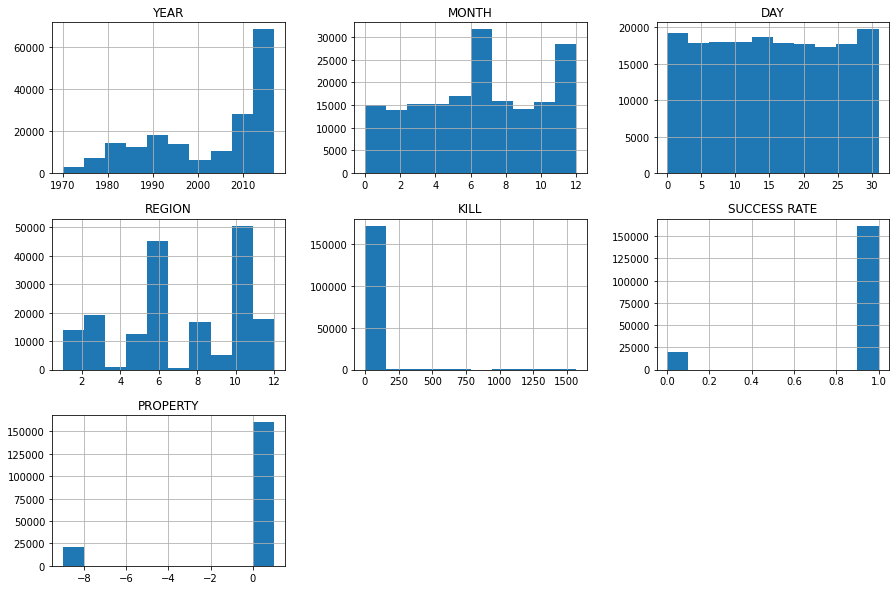

In [ ]:
# Histogram of the Data
data_relevant.hist(figsize=(15,10));

In [ ]:
yearwise_attack_on_India = data_relevant[data_relevant['COUNTRY'] == 'India']['YEAR'].value_counts().sort_values(ascending=True)
yearwise_attack_on_India

1976       1
1972       1
1975       1
1977       1
1980      10
1982      13
1981      16
1979      20
1985      39
1983      47
1998      61
1986      96
1994     107
2004     108
1999     112
2005     146
2007     149
1984     159
1987     166
2006     167
1995     179
2000     180
2002     184
1997     193
2003     196
1996     213
2001     234
1992     237
1989     324
1991     339
1990     349
1988     358
2008     534
2012     611
2011     645
2010     663
2009     672
2013     694
2014     860
2015     884
2017     966
2016    1025
Name: YEAR, dtype: int64

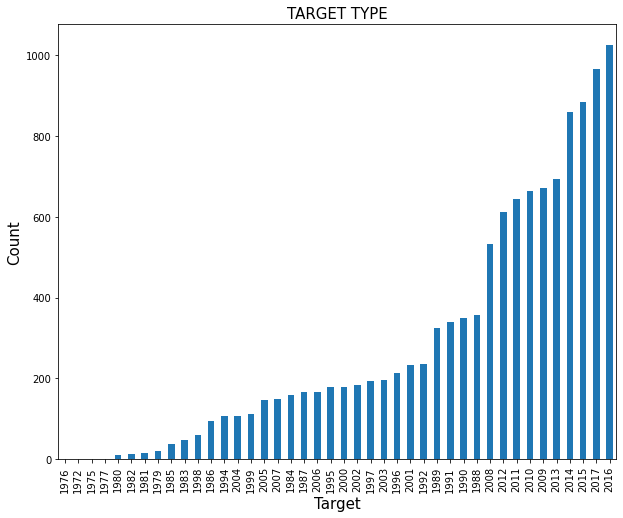

In [ ]:
yearwise_attack_on_India.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Target', fontsize = 15)
plt.ylabel('Count', fontsize=15)
plt.title('TARGET TYPE',fontsize =15)
plt.show ()

In India also terrorist activities increased every year till 2016 but from 2017 we can see from the above plot that it's decreasing.Which is a good sign for all of us.

**Overall Conclusion:** We can see by analysis not even a single part of world is untouched by the terrosit attacks. This has become a serious concern for humanity. Other than this the Asian country are mostly affected.

**Safety Measures:** 

1.   All the world leaders should come together and make a strong law agains terrorism,as it is the obstacle in way of human development.
 
2.   Security measures must be updated time to time.

1.   Any one found giving hatred speech must be punished as per the law.
2.   Border security defence system should be efficient enough in order to pevent any attacks.

1.   Most importantly we as citizen must be vigilant enough to suspect any type of suspicious activities.

At last we want to conclude by saying that terrorists are not a enemny of any particular country or region, it is the enenmy for whole of humanity.